# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Agaphier Redha B
- **Email:** agaphierredha2@gmail.com
- **ID Dicoding:** agaphier_redha

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan?
- Bagaimana distribusi RFM-nya?

## Import Packages/Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Data customers

In [3]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Data sellers

In [4]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Data geolocation

In [5]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Data orders

In [6]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders_item_df = pd.read_csv("data/order_items_dataset.csv")
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orders_payments_df = pd.read_csv("data/order_payments_dataset.csv")
orders_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
orders_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orders_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Data products

In [10]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
product_name_df = pd.read_csv("data/product_category_name_translation.csv")
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Periksa tipe data dan informasi dasar

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
orders_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
product_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Periksa missing values

In [21]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [23]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [24]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
orders_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
orders_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
orders_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
product_name_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### Periksa duplicate entries

In [30]:
customers_df.duplicated().sum()

np.int64(0)

In [31]:
sellers_df.duplicated().sum()

np.int64(0)

In [32]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [33]:
orders_df.duplicated().sum()

np.int64(0)

In [34]:
orders_item_df.duplicated().sum()

np.int64(0)

In [35]:
orders_payments_df.duplicated().sum()

np.int64(0)

In [36]:
orders_reviews_df.duplicated().sum()

np.int64(0)

In [37]:
products_df.duplicated().sum()

np.int64(0)

In [38]:
product_name_df.duplicated().sum()

np.int64(0)

#### Periksa parameters statistik dasar

In [39]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [40]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [41]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [42]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [43]:
orders_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [44]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [45]:
orders_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [46]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [47]:
product_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### **Insight:**
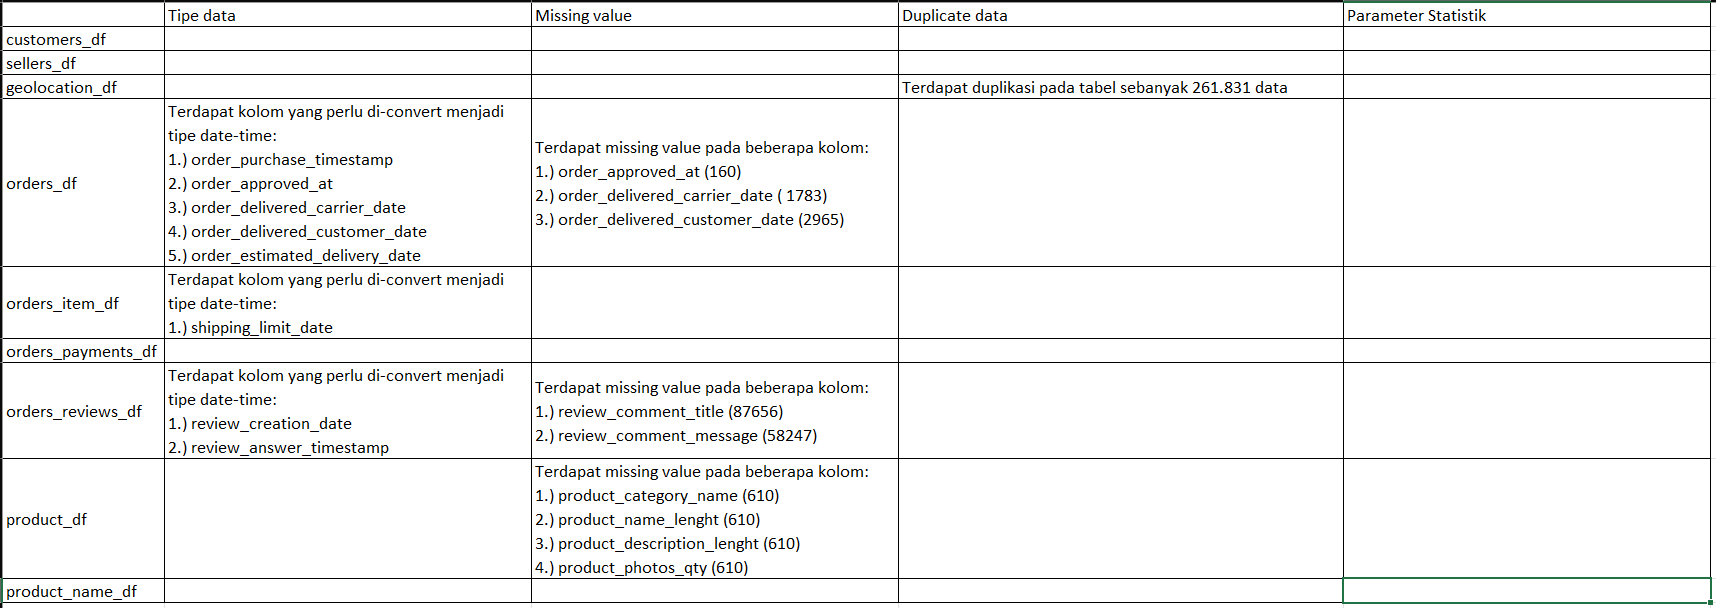

### Cleaning Data

#### Cleaning geolocation_df

In [48]:
# Cleaning duplicate
geolocation_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Cleaning orders_df

In [49]:
# Convert tipe data date-time

datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [50]:
# Melihat sampel data orders_df missing value
missing_data = orders_df[orders_df.isnull().any(axis=1)]
missing_data.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7518,d9091cd1d6e36cfcebc8b01aab81eff8,f58997d56b1cf164d4fb0518c0574422,unavailable,2018-01-04 11:30:24,2018-01-04 11:39:32,NaT,NaT,2018-02-02
43697,0a5c74ccc786ced7903270de9d6c170a,c021456db05f8e71f0985bef8859b793,unavailable,2018-01-18 23:14:36,2018-02-20 12:05:54,NaT,NaT,2018-02-14
53154,e652cdad31d24dcb467a5353d5583ad0,c2d63d487b4bab1ca8ab9134e0058a8d,shipped,2018-04-10 20:27:20,2018-04-12 08:32:18,2018-04-12 17:18:26,NaT,2018-05-15
50190,a90966534748634cbb133383bf0eee68,509585871d9505d583be980046b14b8a,canceled,2018-02-01 16:49:17,2018-02-01 17:15:39,2018-02-02 19:26:53,NaT,2018-02-19
9868,04d551f13024f132b86b2fdb707664ed,e7dce3335777ad9f70242b444c1ce42d,shipped,2017-05-27 00:14:22,2017-05-27 01:15:22,2017-06-06 13:36:34,NaT,2017-06-21
22965,24c30ddeb5a4b85a61bbb58b9e3d66c9,b73c72519bfcc61f91836d7a67ef40d5,canceled,2018-08-07 16:57:23,2018-08-09 03:35:18,NaT,NaT,2018-08-20
25966,03d1edbd314ca7682ec0f3e67d3763e2,963bc458a6c7f3148e1a756a4fc1e012,unavailable,2017-06-29 20:04:14,2017-06-29 20:23:48,NaT,NaT,2017-07-12
29944,db04082694e24f9e426fd68f516b46a3,79298f6a8720081178c7741e3eff8216,shipped,2018-05-16 16:49:12,2018-05-16 17:21:32,2018-05-22 18:44:00,NaT,2018-05-28
39899,19bb130ea3cc2dab25b3bcf2097aa462,50ca8ddb57748311869736678c8dde1e,unavailable,2017-07-19 15:00:02,2017-07-20 02:25:54,NaT,NaT,2017-08-18
57154,b44d797bd9259818b8e3655230d25879,50191e063f53eaf358386bc6158fb737,shipped,2017-07-15 11:44:50,2017-07-15 12:03:43,2017-07-17 20:57:43,NaT,2017-07-28


In [51]:
# Melihat seluruh kolom order_status dengan jumlah masing-masing
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [52]:
# Memfilter data dengan order_status 'delivered'
orders_df = orders_df[orders_df['order_status'] == 'delivered']

In [53]:
# Menghapus data missing value pada status 'delivered'
orders_df = orders_df.dropna()

In [54]:
# Periksa kembali missing value
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Cleaning orders_item_df

In [55]:
# Convert tipe data date-time

datetime_columns = ['shipping_limit_date']
for column in datetime_columns:
    orders_item_df[column] = pd.to_datetime(orders_item_df[column])

orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning orders_review_df

In [56]:
# Convert tipe data date-time

datetime_columns = ['review_creation_date', 'review_answer_timestamp']
for column in datetime_columns:
    orders_reviews_df[column] = pd.to_datetime(orders_reviews_df[column])

orders_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [57]:
# Melihat sampel orders_reviews_df missing value
missing_data = orders_reviews_df[orders_reviews_df.isnull().any(axis=1)]
missing_data.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17514,94cd1042a721bd3cd16a0e2379c5a95f,d01f0aba52a4d7b2cca8d7623538a434,4,NaN,muito bom gostei,2016-11-11,2016-11-11 23:15:08
73025,573270ffcb3bf3a115da6458fbe81685,262b62b8ed582cfe9cc79c93627adb8f,3,NaN,O único ponto negativo foi a demora na entrega...,2018-03-16,2018-03-19 10:43:22
7155,cee8a84f224917466d8468e652318015,5573c35c52d8dc509a11bb0ef66eb409,5,NaN,NaN,2018-02-08,2018-02-10 22:58:05
17385,d46ab270095d1f168e7e3eaf637326fd,90a9fea4de623b810e0b0c5226e21884,5,NaN,NaN,2018-03-29,2018-03-30 11:19:30
2879,6b7ac143204caa60e2c9605b6f626dec,4aa1a55da45bb1b3b091aba5f4e37783,4,NaN,NaN,2018-08-28,2018-08-31 19:55:09
93554,61e7c7e6e3fa98c5294d461f4058c399,da822a9c701ddfc1e11802d3c2545964,5,NaN,NaN,2018-03-23,2018-03-25 18:51:47
67933,3536bc6a9be06fa6423255ff54d9a8f4,38e31ec9d0ed250702ede5bb610d963b,5,NaN,NaN,2017-08-29,2017-08-30 00:56:43
53371,168ba75065b80ec0f41e3e358d21f362,91151a1839749882e607fb8d0c0a2a71,4,NaN,NaN,2018-01-27,2018-01-28 13:13:46
55101,812a620f03fcf1ce62d49c186871be64,5186d475bd6d5839473d5a6b8669638b,1,NaN,Recebi o produto errado,2018-01-25,2018-01-25 23:55:20
32365,16c58bec19841d04856b5e5aa71e8aaf,ced0e946ad5799158b4bebd93c91a100,3,NaN,NaN,2018-04-04,2018-04-06 11:03:53


#### Cleaning products_df

In [58]:
# Melihat sampel products_df missing value
missing_data = products_df[products_df.isnull().any(axis=1)]
missing_data.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32306,8d0e7a8e1b1fb5343135045cb7c21542,NaN,NaN,NaN,NaN,1800.0,26.0,25.0,47.0
22445,99c3deeef8923c1036a30a5abed9071c,NaN,NaN,NaN,NaN,1000.0,40.0,28.0,25.0
20692,b36f3c918c91478c4559160022d3f14e,NaN,NaN,NaN,NaN,300.0,16.0,4.0,11.0
6051,4f0aa1e91719362daf498003e6ad4177,NaN,NaN,NaN,NaN,1800.0,20.0,30.0,20.0
12079,cdd63834cc3da0f9225cc20f494dc137,NaN,NaN,NaN,NaN,700.0,25.0,5.0,19.0
11195,2ddbeb76f134690c05636162f2558594,NaN,NaN,NaN,NaN,1400.0,35.0,10.0,35.0
19363,cebad0ed16ecd450b97d2be843d3da86,NaN,NaN,NaN,NaN,800.0,16.0,20.0,15.0
1286,48270bcc7097939dcf14a537d7128054,NaN,NaN,NaN,NaN,1000.0,30.0,30.0,30.0
28910,ad5f871bf1f82cf7aed349162ab802e6,NaN,NaN,NaN,NaN,1600.0,24.0,13.0,15.0
25804,82f142f09dd26762af87b2a889f6ed58,NaN,NaN,NaN,NaN,340.0,23.0,8.0,15.0


In [59]:
# Membersihkan missing value pada products_df
products_df = products_df.dropna()
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Explore Data Orders

##### orders_df

In [60]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
# Cek duplikasi kolom order_id dan customer_id
print("Jumlah duplikasi order_id: ", orders_df['order_id'].duplicated().sum())
print("Jumlah duplikasi customer_id: ", orders_df['customer_id'].duplicated().sum())


Jumlah duplikasi order_id:  0
Jumlah duplikasi customer_id:  0


##### orders_item_df

In [62]:
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [96]:
# Cek duplikasi kolom order_id dan product_id
print("Jumlah duplikasi order_id: ", orders_item_df['order_id'].duplicated().sum())
print("Jumlah duplikasi product_id: ", orders_item_df['product_id'].duplicated().sum())

Jumlah duplikasi order_id:  13984
Jumlah duplikasi product_id:  79699


In [92]:
# tampilkan duplikasi kolom order_id
print("Duplikasi order_id:")
print(orders_item_df[orders_item_df['order_id'].duplicated(keep=False)])

Duplikasi order_id:
                                order_id  order_item_id  \
13      0008288aa423d2a3f00fcb17cd7d8719              1   
14      0008288aa423d2a3f00fcb17cd7d8719              2   
32      00143d0f86d6fbd9f9b38ab440ac16f5              1   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
...                                  ...            ...   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
13      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32      e95ee6822b66ac6058e2e4aff6560

##### orders_payments_df

In [63]:
orders_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### orders_reviews_df

In [64]:
orders_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


##### Insight:
- Data **orders_df** berisi detail transaksi dengan kolom **order_id** dan **customer_id** yang bersifat unique, **order_status** yang telah difilter "delivered", serta data date-time mulai dari **order_purchase_timestamp** hingga **order_estimated_delivery_date**.
- Data **orders_item_df** berisi detail list produk dari **orders_df** dengan turunan **order_item_id** dan **product_id** beserta **seller_id**. Selain itu data ini mencakup informasi **shipping_limit_date**, **price**, dan **freight_value**.
- Data **orders_payments_df** berisi informasi detail metode pembayaran sedangkan data **orders_reviews_df** berisi testimoni dari pesanan customer. Untuk analisa ini, kedua data tersebut tidak digunakan karena mempertimbangkan relevansi dengan pertanyaan yang telah disusun diawal.

#### Explore Data Products

In [65]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [66]:
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Insight:
- products_df berisi detail produk serta nama kategori berbahasa Spanyol.
- product_name_df berisi terjemahan kategori produk dari bahasa Spanyol ke bahasa Inggris.
- Diperlukan data products_df dengan kolom id dan nama kategori berbahasa Inggris.

In [67]:
# Ganti product_category_name dengan product_category_name_english
products_df = products_df.merge(product_name_df, on='product_category_name', how='left')
products_df.drop('product_category_name', axis=1, inplace=True)
products_df.head()


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [68]:
# Seleksi kolom product_id dan product_category_name_english
products_df = products_df[['product_id', 'product_category_name_english']]

# Ganti nama kolom product_category_name_english menjadi product_category_name
products_df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


#### Explore Data Customers, Data Sellers, Data Geolocation

In [69]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [70]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [71]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Insight:
- Data customers_df dan sellers_df berisi data lokasi dengan detail kode pos, kota, dan negara, tanpa detail nama dari masing-masing id.
- Data geolocation_df berisi detail Garis Lintang (geolocation_lat) dan Garis Bujur (geolocation_lng) dari id kode pos.
- Dalam analisis ini, data geolocation_df tidak terlalu diperlukan. Hanya berfokus pada data lokasi customers_df.

### Merge Data

In [72]:
# Merge orders_df, orders_item_df, products_df, customers_df
merged_df = orders_df.merge(orders_item_df, on='order_id', how='left')
merged_df = merged_df.merge(products_df, on='product_id', how='left')
merged_df = merged_df.merge(customers_df, on='customer_id', how='left')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [73]:
# Cek data hilang pada merged_df
merged_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1559
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [74]:
# Mengganti kolom product_category_name yang missing value pada merged_df dengan "Others"
merged_df['product_category_name'] = merged_df['product_category_name'].fillna('Others')
merged_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

### Explore merged_df

In [75]:
# 10 produk terlaris berdasarkan jumlah penjualan
top_products = merged_df.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False).head(10)
top_products.reset_index(name='jumlah_penjualan')

,product_category_name,jumlah_penjualan
0,bed_bath_table,10952
1,health_beauty,9465
2,sports_leisure,8428
3,furniture_decor,8156
4,computers_accessories,7643
5,housewares,6795
6,watches_gifts,5857
7,telephony,4428
8,garden_tools,4267
9,auto,4139


In [76]:
# 10 produk kurang laris berdasarkan jumlah penjualan
bottom_products = merged_df.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=True).head(10)
bottom_products.reset_index(name='jumlah_penjualan')

,product_category_name,jumlah_penjualan
0,security_and_services,2
1,fashion_childrens_clothes,7
2,la_cuisine,14
3,cds_dvds_musicals,14
4,arts_and_craftmanship,24
5,fashion_sport,29
6,home_comfort_2,30
7,flowers,33
8,furniture_mattress_and_upholstery,37
9,diapers_and_hygiene,37


In [77]:
# Kota dengan jumlah pelanggan terbanyak
top_cities = merged_df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).head(10)
top_cities.reset_index(name='jumlah_pelanggan')

,customer_city,jumlah_pelanggan
0,sao paulo,15043
1,rio de janeiro,6600
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [78]:
# Produk dengan harga tertinggi
top_price_products = merged_df.groupby('product_category_name')['price'].max().sort_values(ascending=False).head(10)
top_price_products.reset_index(name='harga_tertinggi')

,product_category_name,harga_tertinggi
0,housewares,6735.00
1,computers,6729.00
2,art,6499.00
3,small_appliances,4799.00
4,musical_instruments,4399.87
5,consoles_games,4099.99
6,sports_leisure,4059.00
7,watches_gifts,3999.90
8,Others,3980.00
9,garden_tools,3930.00


In [79]:
# Produk dengan penyumbang revenue terbesar
top_revenue_products = merged_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)
top_revenue_products.reset_index(name='total_revenue')

,product_category_name,total_revenue
0,health_beauty,1233131.72
1,watches_gifts,1165898.98
2,bed_bath_table,1023300.77
3,sports_leisure,954604.57
4,computers_accessories,888613.62
5,furniture_decor,711493.09
6,housewares,615628.69
7,cool_stuff,609964.13
8,auto,578849.35
9,toys,471097.49


In [80]:
# Kota dengan penyumbang revenue terbesar
top_revenue_cities = merged_df.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(10)
top_revenue_cities.reset_index(name='total_revenue')

,customer_city,total_revenue
0,sao paulo,1859357.04
1,rio de janeiro,955475.97
2,belo horizonte,346039.04
3,brasilia,295814.72
4,curitiba,205999.33
5,campinas,184657.87
6,porto alegre,182140.55
7,salvador,173273.05
8,guarulhos,138897.20
9,niteroi,115890.26


## Visualization & Explanatory Analysis

In [81]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Pertanyaan 1: Bagaimana performa penjualan dalam beberapa bulan terakhir?

In [82]:
# Konversi data jumlah order dan total revenue bulanan

monthly_orders_df = merged_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "gross_sales"
}, inplace=True)

monthly_orders_df.head()

C:\Users\sitgo\AppData\Local\Temp\ipykernel_36448\2072375298.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = merged_df.resample(rule='M', on='order_approved_at').agg({


,order_count,gross_sales
order_approved_at,,
2016-09,1,134.97
2016-10,265,40325.11
2016-11,0,0.00
2016-12,1,10.90
2017-01,715,106888.10


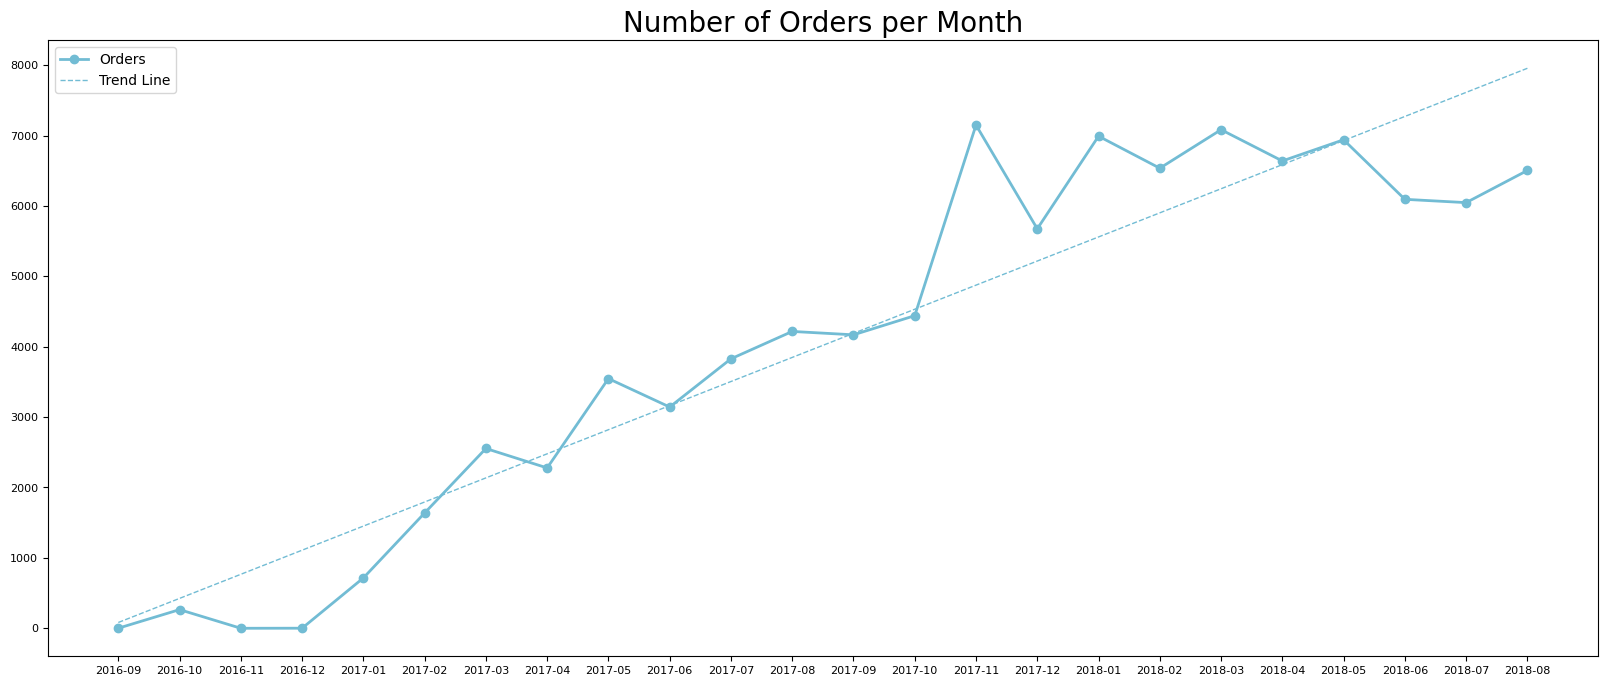

In [83]:
# Visualisasi line chart

plt.figure(figsize=(20, 8))

# Plot data
plt.plot(
    monthly_orders_df.index,
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color='#72BCD4',
    label='Orders'
)

# Buat trendline

# Ubah index (tanggal/bulan) jadi angka
x = np.arange(len(monthly_orders_df))
y = monthly_orders_df["order_count"].values

# Hitung regresi linear
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(
    monthly_orders_df.index,
    p(x),
    linewidth=1,
    label='Trend Line',
    linestyle='--',
    color='#72BCD4'
)

plt.title("Number of Orders per Month", loc='center', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend()

plt.show()


### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

In [84]:
# Create dataframe penjualan per produk
sum_order_item_df = merged_df.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False).reset_index()
sum_order_item_df.head(10)

,product_category_name,order_item_id
0,bed_bath_table,10952
1,health_beauty,9465
2,sports_leisure,8428
3,furniture_decor,8156
4,computers_accessories,7643
5,housewares,6795
6,watches_gifts,5857
7,telephony,4428
8,garden_tools,4267
9,auto,4139


C:\Users\sitgo\AppData\Local\Temp\ipykernel_36448\3078574908.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_item_id', y='product_category_name', data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
C:\Users\sitgo\AppData\Local\Temp\ipykernel_36448\3078574908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_item_id', y='product_category_name', data=sum_order_item_df.sort_values(by='order_item_id', ascending=True).head(5), palette=colors, ax=ax[1])


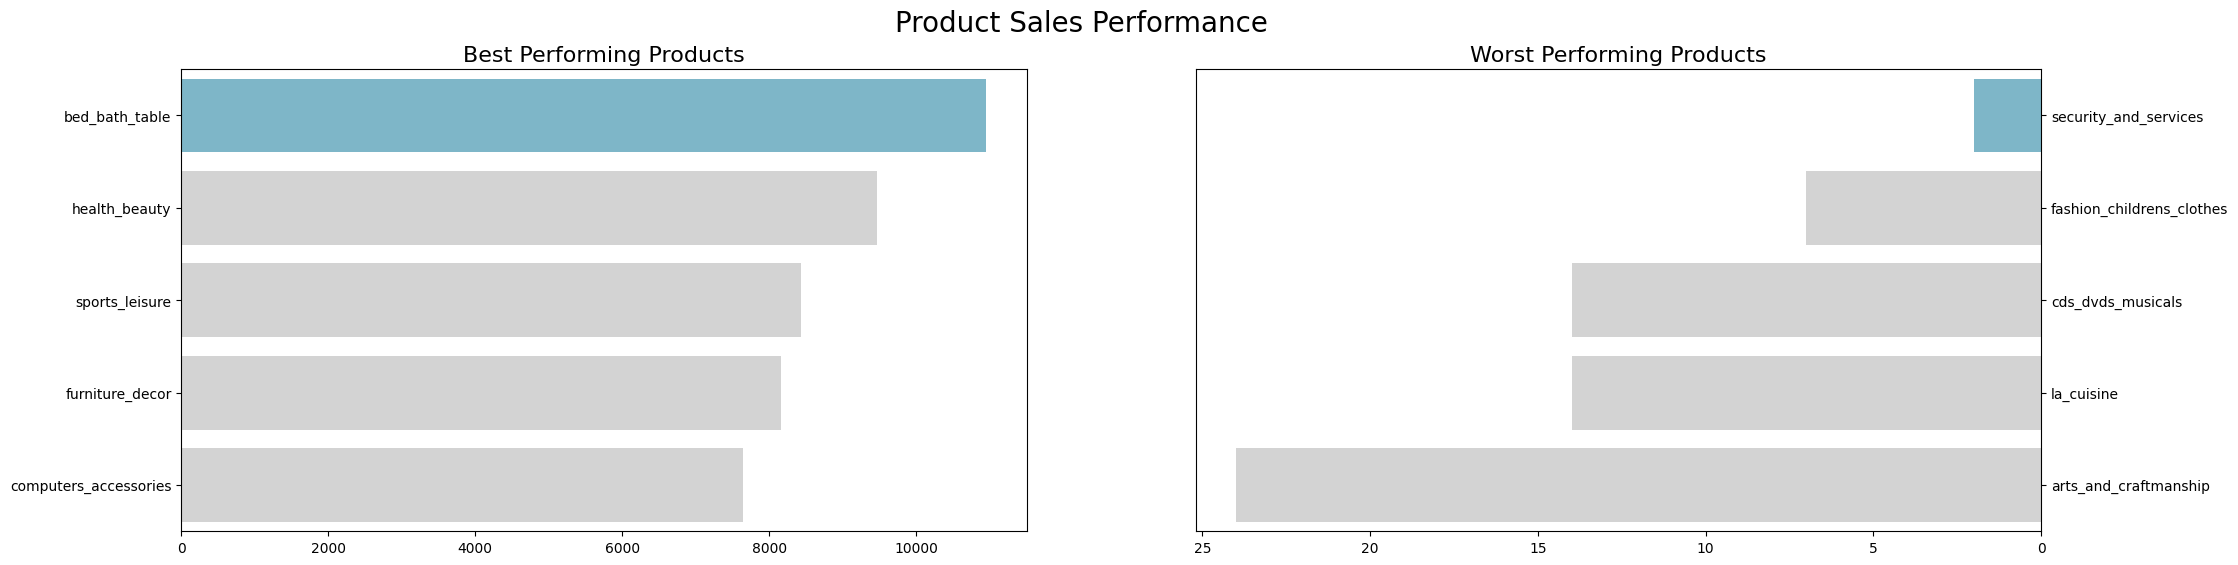

In [85]:
# Visualisasi bar chart penjualan per produk

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='order_item_id', y='product_category_name', data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Products", loc="center", fontsize=16)
ax[0].tick_params(axis='y', labelsize=10)

sns.barplot(x='order_item_id', y='product_category_name', data=sum_order_item_df.sort_values(by='order_item_id', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Products", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=10)

plt.suptitle("Product Sales Performance", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana demografi pelanggan berdasarkan lokasi?

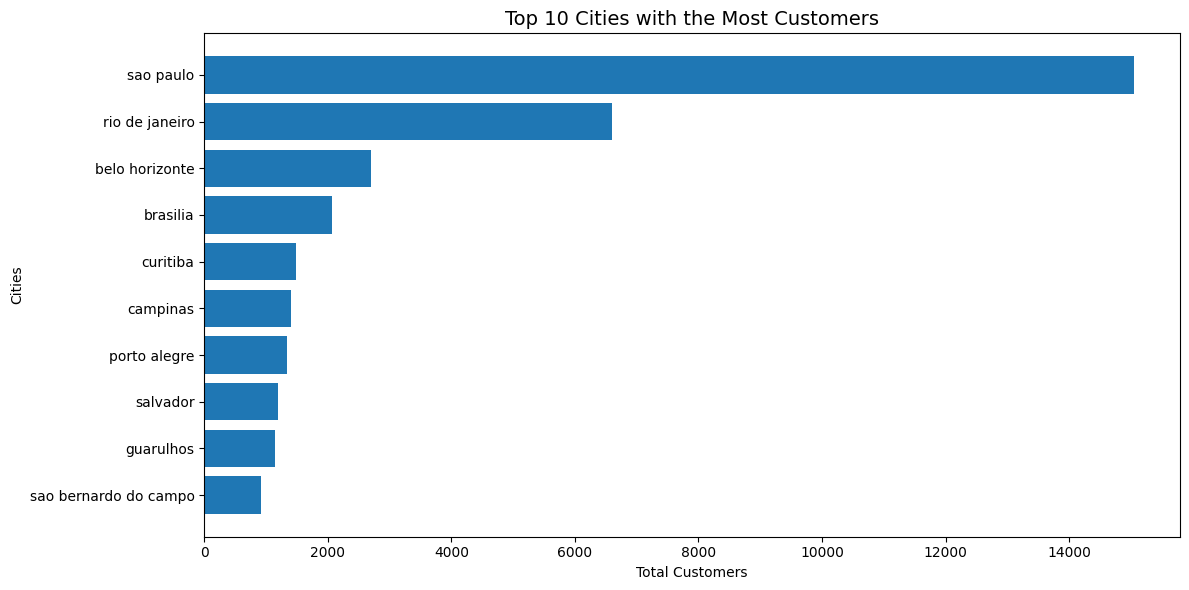

In [86]:
# Ambil top 10 kota
top_cities = (
    merged_df
    .groupby('customer_city')['customer_id']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Plot bar chart
plt.figure(figsize=(12,6))
plt.barh(top_cities.index[::-1], top_cities.values[::-1])

plt.title("Top 10 Cities with the Most Customers", fontsize=14)
plt.xlabel("Total Customers")
plt.ylabel("Cities")

plt.tight_layout()
plt.show()


### Pertanyaan 4: Bagaimana distribusi RFM-nya?

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   customer_id                    110173 non-null  object        
 2   order_status                   110173 non-null  object        
 3   order_purchase_timestamp       110173 non-null  datetime64[ns]
 4   order_approved_at              110173 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 6   order_delivered_customer_date  110173 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 8   order_item_id                  110173 non-null  int64         
 9   product_id                     110173 non-null  object        
 10  seller_id                      110173 non-null  object        
 11  

In [88]:
rfm_df = merged_df

# Tentukan tanggal referensi (hari terakhir di dataset)
reference_date = rfm_df['order_purchase_timestamp'].max()

rfm = rfm_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

rfm.head()

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,536,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00


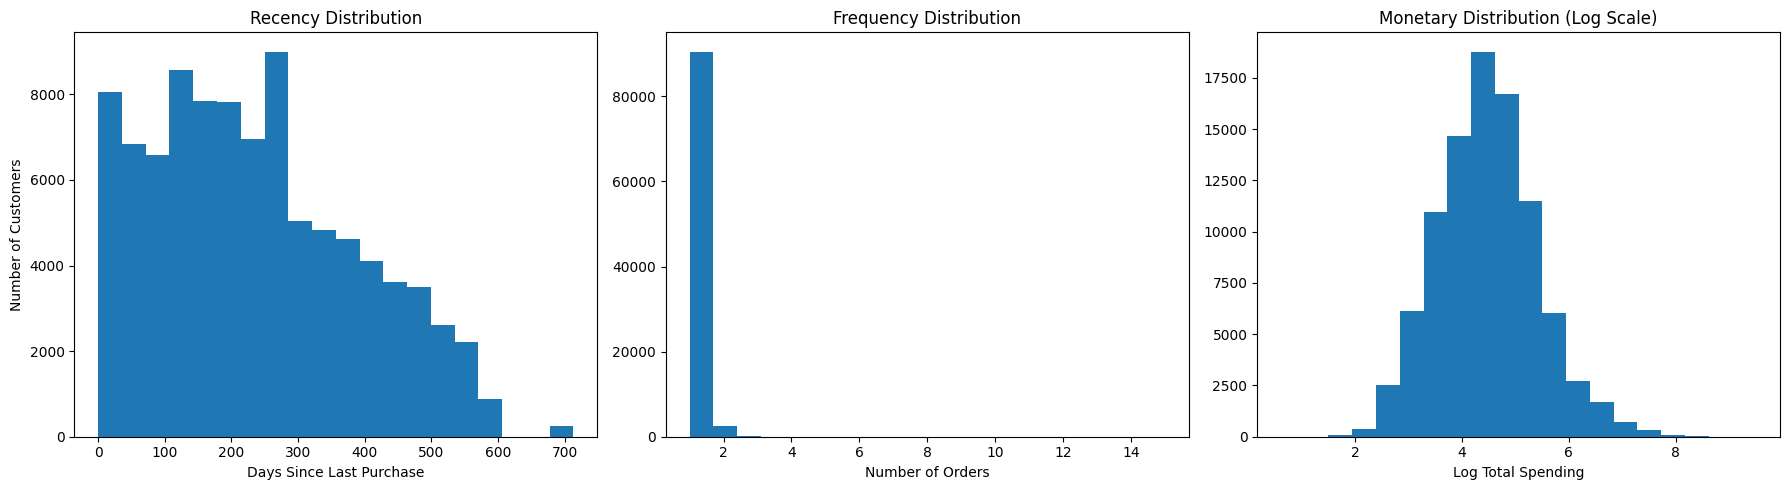

In [89]:
# Visualisasi RFM

plt.figure(figsize=(18,5))

# Recency
plt.subplot(1,3,1)
plt.hist(rfm['recency'], bins=20)
plt.title("Recency Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")


# Frequency
plt.subplot(1,3,2)
plt.hist(rfm['frequency'], bins=20)
plt.title("Frequency Distribution")
plt.xlabel("Number of Orders")

# Monetary (Log Scale Recommended)
plt.subplot(1,3,3)
plt.hist(np.log1p(rfm['monetary']), bins=20)
plt.title("Monetary Distribution (Log Scale)")
plt.xlabel("Log Total Spending")

plt.tight_layout()
plt.show()


## Conclusion

- Penjualan pada bulan September 2016 hingga Agustus 2018 mengalami trend yang meningkat. Jumlah order tertinggi terjadi pada bulan November 2017.
- Penjualan didominasi oleh kategori bed_bath_table dan health_beauty, sementara security_and_services dan arts_and_craftmanship menunjukkan performa sangat rendah.
- Customer base sangat terkonsentrasi di Sao Paulo. Model bisnis sangat kuat di area metropolitan, namun belum tersebar merata secara geografis.
- Banyak customer beli 1x lalu hilang, ada sebagian kecil loyal dan high spender, banyak customer berisiko churn.